# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

**Columns**

**•age:** age of primary beneficiary

**•sex:** insurance contractor gender, female, male

**•bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

**•children:** Number of children covered by health insurance / Number of dependents

**•smoker:** Smoking

**•region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**•charges:** Individual medical costs billed by health insurance


**Predict :** Can you accurately predict insurance costs?

# Dataset Link-

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv

# Answer:-

In [1]:
#Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Checking null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Checking for duplicate rows
df.duplicated().sum()

1

*1 row is duplicate*

In [6]:
#Finding that duplicate row
dup_row_index=df.duplicated()
dup_row_index

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
df[dup_row_index]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


**Here you can see 581 index row is the duplicated row**

In [8]:
#Fetching duplicated row using it's row index
df.iloc[581]

age                19
sex              male
bmi             30.59
children            0
smoker             no
region      northwest
charges     1639.5631
Name: 581, dtype: object

In [9]:
#Deleting the duplicated row
df.drop(581,axis=0,inplace=True)

In [10]:
#Checking for the duplicate row again
df.duplicated().sum()

0

**Now our dataset has 0 duplicated row**

<Axes: >

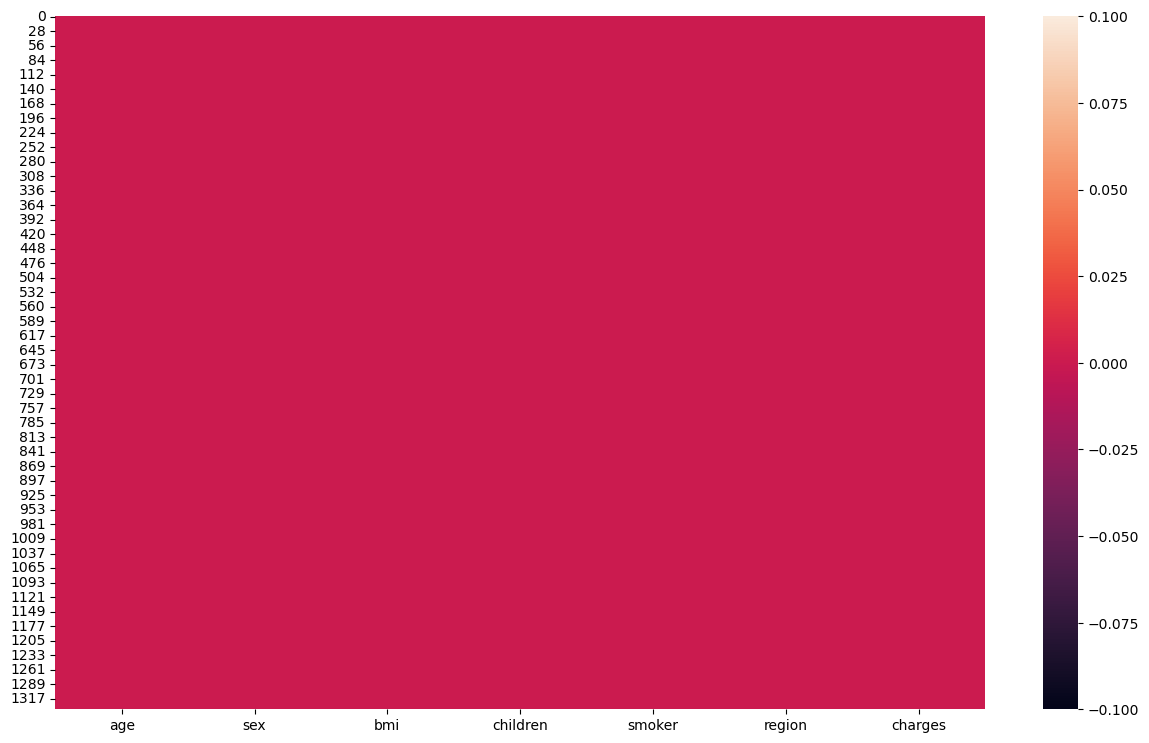

In [11]:
#Visualizing null value using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

In [12]:
#Checking unique values for all columns
df.nunique().to_frame("Number of unique values")

,Number of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
df["charges"].shape

(1337,)

**Observation:-** *Our Target column for df dataset is "charges".As I can see the difference between the "charges" column unique values and the count of data is has is very low(0-means all values are unique in this column).So clearly we can see it's a Regression problem.*

In [14]:
#Checking for value counts for each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      675
female    662
Name: sex, dtype: int64


32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64


0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1063
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
      

In [15]:
#Checking statistical summary of data
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


**Observation:-**
    
*1) For "age","bmi","children" mean is slightly high against median that means these columns have right skewed data.*
    
*2) For "Charges" column median(50%) is higher than the mean so that means this column data distribution is left skewed*
    
*Here you can see for "children" column there is hign difference between 75% and Maximum,so there might be outliers present.(We have to ignore outliers for our Target variable("charges")*

# Visualization

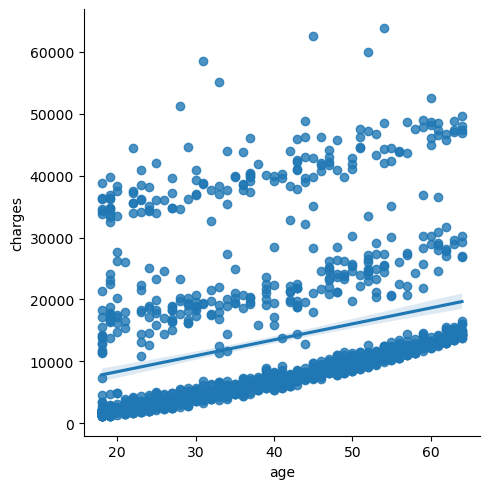

In [16]:
sns.lmplot(x="age",y="charges",data=df)

*Here you can see the "age" has positive correlation with "charges".When ever the age increases the charges of medical insurance is also increases.*

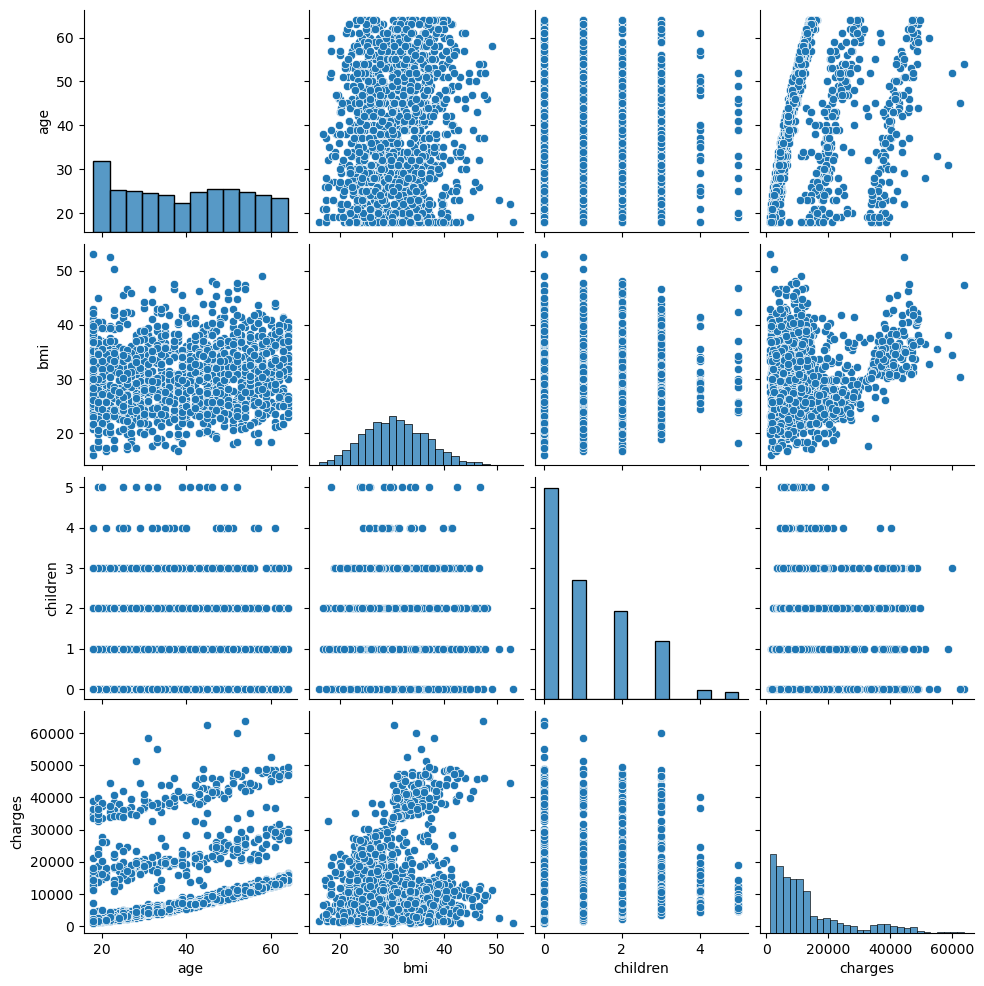

In [17]:
#Multi variate analysis 
sns.pairplot(df)
plt.show()

# Encoding Categorical Columns

In [18]:
#Here I am using LableEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])
        
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


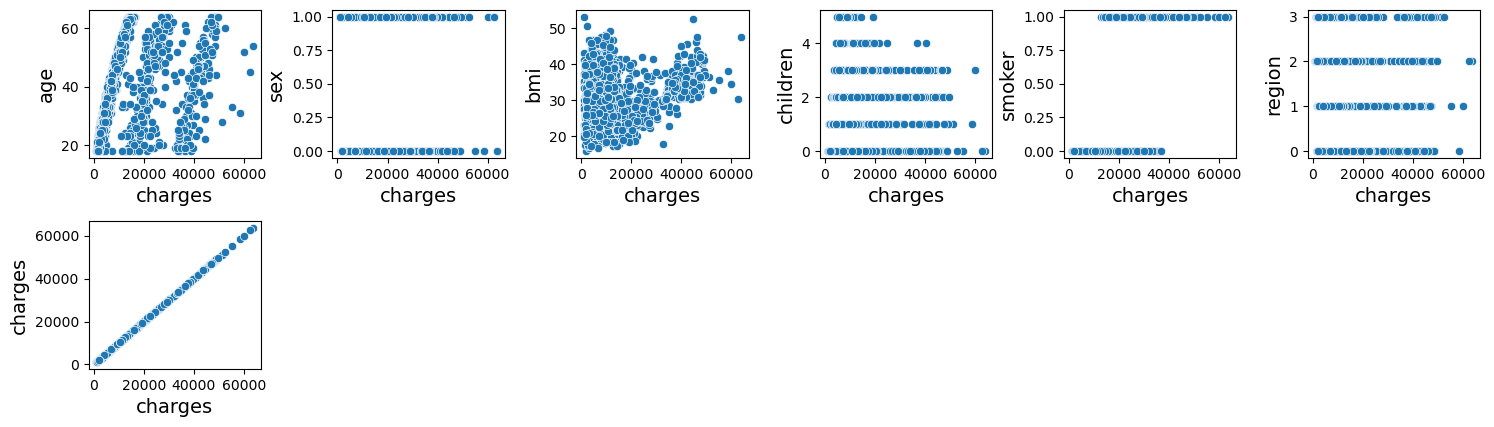

In [19]:
#I am ploting the graphs where our Target column("charges") is constent and I am using lmplot to see relationship of all columns with our Target column
plt.figure(figsize=(15,6))
p=1
for i in df.columns:
    if p<17:
        plt.subplot(3,6,p)
        sns.scatterplot(x="charges",y=i,data=df)
        plt.xlabel("charges",fontsize=14)
        plt.ylabel(i,fontsize=14)
            
            
    p+=1
        
plt.tight_layout()


**Here lmplot() did not work with subplot so I had to use scatterplot().**

# Checking outliers

**We have to check oulliers only for the numerical columns,not for the categorical columns.We have to exclude our Target variable also.**

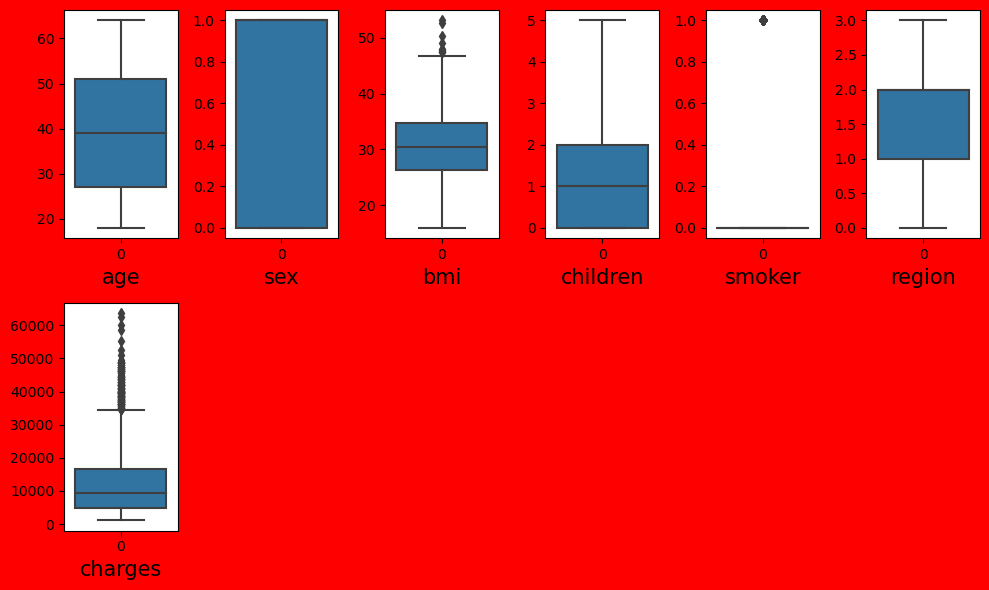

In [20]:
#numerical_cols=["age","bmi","children","charges"]

#Lets check the outliers for numerical columnns using boxplot
plt.figure(figsize=(10,6),facecolor="r")
plot_n=1
for col in df.columns:
    if plot_n<=14:
        plt.subplot(2,6,plot_n)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plot_n+=1
plt.tight_layout()

*Here you can see "bmi","smoker","charges" these columns has outliers.**but I have to consider only "bmi" column that has outliers because "smoker" is a categorical column and "charges" is our Target variable so we have to ignore these columns**.*

# Removing outliers from numerical columns

In [21]:
numerical_columns=df[["age","bmi","children","charges"]]

from scipy.stats import zscore
z=np.abs(zscore(numerical_columns))
z

,age,bmi,children,charges
0,1.440418,0.453160,0.909234,0.297857
1,1.511647,0.509422,0.079442,0.954381
2,0.799350,0.383155,1.580143,0.729373
3,0.443201,1.305052,0.909234,0.719104
4,0.514431,0.292456,0.909234,0.777499
...,...,...,...,...
1333,0.767704,0.050269,1.580143,0.221263
1334,1.511647,0.206053,0.909234,0.914695
1335,1.511647,1.014490,0.909234,0.962287
1336,1.297958,0.797524,0.909234,0.931054


In [22]:
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
        1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64),
 array([2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 2, 2, 2, 2, 1, 2, 2,
        2, 3, 3, 2, 2, 3, 1], dtype=int64))

In [23]:
#Checking outliers by giving outliers location
z.iloc[32,2]

3.2397285521666808

In [24]:
#Creating a outlier free dataset
df_new=df[(z<3).all(axis=1)]
df_new.shape[0]

1308

In [25]:
print("Old Dataframe:",df.shape[0])
print("New Dataframe:",df_new.shape[0])

Old Dataframe: 1337
New Dataframe: 1308


In [26]:
#Checking dataloss percentage
print("Data loss percentage using zscore",((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Data loss percentage using zscore 2.169035153328347


# Checking outliers using IQR method

In [27]:
#Q3
Q3=numerical_columns.quantile(.75)

In [28]:
#Q1
Q1=numerical_columns.quantile(.25)

In [29]:
#IQR
IQR=Q3-Q1
new_df2=df[~((df<(Q1-1.5*IQR))  | (df>(Q3+1.5*IQR))).any(axis=1)]

In [30]:
print("Old Dataframe:",df.shape[0])
print("New Dataframe:",df_new.shape[0])
print("IQR new DataFrame",new_df2.shape[0])

Old Dataframe: 1337
New Dataframe: 1308
IQR new DataFrame 1192


In [31]:
#Checking dataloss percentage in IQR method
print("Data loss percentage using zscore",((df.shape[0]-new_df2.shape[0])/df.shape[0])*100)

Data loss percentage using zscore 10.845175766641734


**Ovservation:-** *Data loss percentage is too high for IQR method so I consider df_new as my outlier free dataset.*

# Checking data distribution for all columns

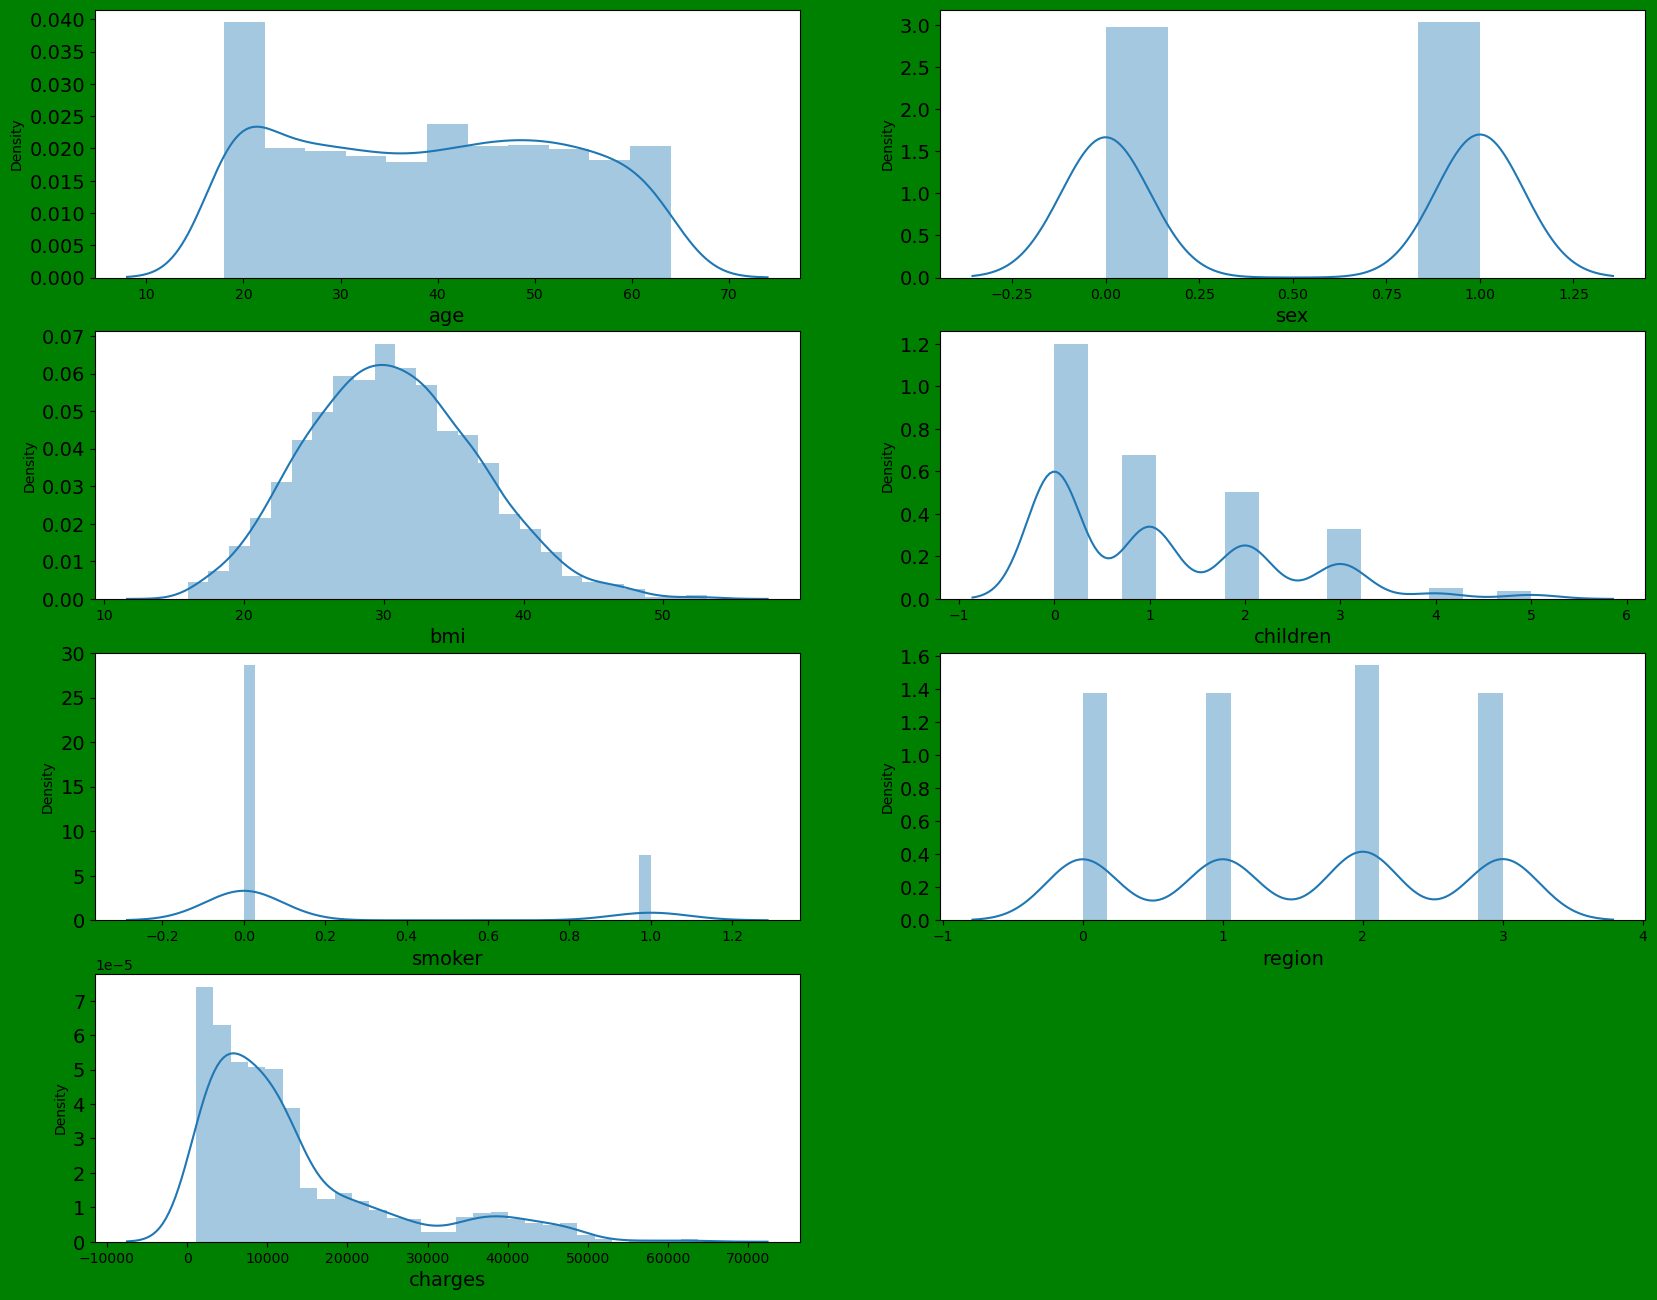

In [32]:
plt.figure(figsize=(20,16),facecolor="g")
plot_holder=1
for col in df_new.columns:
    if plot_holder<19:
        plt.subplot(4,2,plot_holder)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation=0,fontsize=14)
    plot_holder+=1
    
plt.show()

**Observation:-** *Here you can see all columns data distribution is normal apart from the "children" and "charges"."children" has little bit of right tail skewness and "charges" is our Target column so we have to ignore it's skewness.*

# Checking skewness

In [33]:
df_new.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children    0.737050
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

**Acceptable range is +0.5 to -0.5**
**Observation:-** *Here "smoker" is a categorical column so we shold avoid it's skewness."charges" is our Target column so we have to ignore this column also.So we left with only "children" who's skewness is not in acceptable range so we have to remove it's skewness.*   

In [34]:
#Removing skewness from "children" column using cbrt
df_new["children"]=np.cbrt(df_new["children"])


In [35]:
#Checking skewness again
df_new.skew()

age         0.050421
sex        -0.009185
bmi         0.191361
children   -0.102995
smoker      1.481539
region     -0.024001
charges     1.436653
dtype: float64

**Now you can see "children" column's skewness is in acceptable range**

<Axes: xlabel='children', ylabel='Density'>

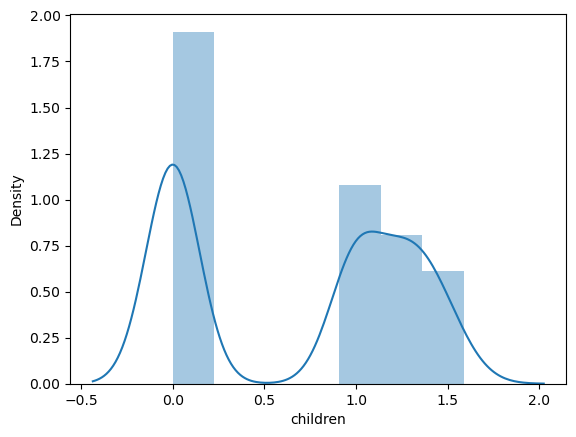

In [36]:
#Checking distribution of children column again
sns.distplot(df_new["children"])

**Now you can see distribution is normal**

# Correlation between all the columns

In [37]:
df_new.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.018180,0.118272,0.057882,-0.029671,0.002619,0.304541
sex,-0.018180,1.000000,0.042514,0.015159,0.079479,0.003434,0.060242
bmi,0.118272,0.042514,1.000000,0.026388,-0.005289,0.160139,0.191523
children,0.057882,0.015159,0.026388,1.000000,0.022279,0.005197,0.090475
smoker,-0.029671,0.079479,-0.005289,0.022279,1.000000,-0.003651,0.785115
region,0.002619,0.003434,0.160139,0.005197,-0.003651,1.000000,-0.007978
charges,0.304541,0.060242,0.191523,0.090475,0.785115,-0.007978,1.000000


<Axes: >

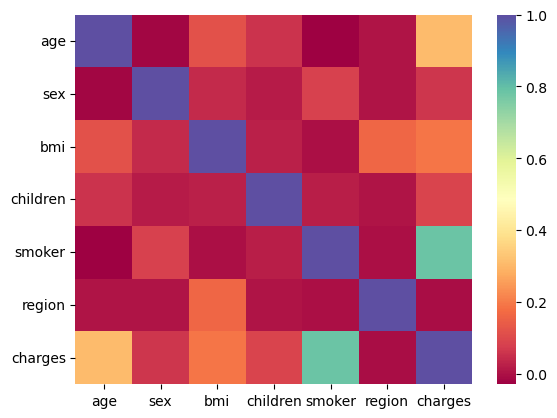

In [38]:
#Visualize with heatmap
sns.heatmap(df_new.corr(),cmap="Spectral")

**Observation:-** *All the columns are possitively correlated with Target column only region column is slightly negative correlated with Target column.*

In [39]:
#Checking correlation of all the columns with Target variable in ascending order
df_new.corr().charges.sort_values(ascending=False)

charges     1.000000
smoker      0.785115
age         0.304541
bmi         0.191523
children    0.090475
sex         0.060242
region     -0.007978
Name: charges, dtype: float64

# Separating features and label

In [40]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [41]:
x.head(2)

,age,sex,bmi,children,smoker,region
0,19,0,27.90,0.0,1,3
1,18,1,33.77,1.0,0,2


In [42]:
y.tail(2)

1336     2007.9450
1337    29141.3603
Name: charges, dtype: float64

In [43]:
print("Features dimention",x.shape)
print("Label dimention",y.shape)

Features dimention (1308, 6)
Label dimention (1308,)


# Feature scaling using StandardScaler

In [44]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.440754,-1.004598,-0.449186,-1.111567,1.983897,1.351994
1,-1.511806,0.995423,0.533188,0.527482,-0.504058,0.446975
2,-0.801288,0.995423,0.404324,1.252350,-0.504058,0.446975
3,-0.446029,0.995423,-1.318596,-1.111567,-0.504058,-0.458045
4,-0.517081,0.995423,-0.285179,-1.111567,-0.504058,-0.458045
...,...,...,...,...,...,...
1303,0.761851,0.995423,0.064594,1.252350,-0.504058,-0.458045
1304,-1.511806,-1.004598,0.223581,-1.111567,-0.504058,-1.363065
1305,-1.511806,-1.004598,1.048641,-1.111567,-0.504058,0.446975
1306,-1.298651,-1.004598,-0.800632,-1.111567,-0.504058,1.351994


We scaled our data using StandardScaler.

# Checking the Variance Inflation Factor(V.I.F)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

,VIF Value,Features Name
0,1.019011,age
1,1.008875,sex
2,1.043659,bmi
3,1.004522,children
4,1.007734,smoker
5,1.026633,region


**Acceptable range is 10,so here VIF value is good for all columns.**

# Modeling

# Finding The Best random_state

In [46]:
#importing require libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MaxAcc=0
MaxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ETR=ExtraTreesRegressor()
    ETR.fit(x_train,y_train)
    pred=ETR.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>MaxAcc:
        MaxAcc=acc
        MaxRs=i
        
print("The best accuracy is",MaxAcc,"at the Random State",MaxRs)




The best accuracy is 0.8859669192298187 at the Random State 82


# Creating train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=MaxRs)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge


In [49]:
#Testing Linearregression r2_score with all error metrics
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLR))
print("Mean Squared Error:-",mean_squared_error(y_test,predLR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLR)))

R2 Score:- 0.804162380490325
Mean Squared Error:- 30233283.314915206
Mean Absolute Error:- 3908.491612242151
Root Mean Absolute Error:- 62.51793032596449


In [50]:
#Testing RandomForestRegressor r2_score with all error metrics
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRFR))
print("Mean Squared Error:-",mean_squared_error(y_test,predRFR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRFR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRFR)))

R2 Score:- 0.8984306895626948
Mean Squared Error:- 15680203.559663454
Mean Absolute Error:- 2299.1589999354087
Root Mean Absolute Error:- 47.949546399683584


In [51]:
#Testing ExtraTreesRegressor r2_score with all error metrics
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predETR))
print("Mean Squared Error:-",mean_squared_error(y_test,predETR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predETR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predETR)))

R2 Score:- 0.8852051617860967
Mean Squared Error:- 17721951.86757432
Mean Absolute Error:- 2229.4057151176853
Root Mean Absolute Error:- 47.21658305211936


In [52]:
#Testing DecisionTreeRegressor r2_score with all error metrics
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predDTR))
print("Mean Squared Error:-",mean_squared_error(y_test,predDTR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predDTR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predDTR)))

R2 Score:- 0.8003299200226724
Mean Squared Error:- 30824936.04947077
Mean Absolute Error:- 2483.4449442849873
Root Mean Absolute Error:- 49.83417446175854


In [53]:
#Testing KNeighborsRegressor r2_score with all error metrics
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predKNN))
print("Mean Squared Error:-",mean_squared_error(y_test,predKNN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predKNN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predKNN)))

R2 Score:- 0.8594518191807715
Mean Squared Error:- 21697736.015902396
Mean Absolute Error:- 3008.949603096692
Root Mean Absolute Error:- 54.85389323554612


In [54]:
#Testing SVR r2_score with all error metrics
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print("R2 Score:-",r2_score(y_test,predsvr))
print("Mean Squared Error:-",mean_squared_error(y_test,predsvr))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predsvr))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predsvr)))

R2 Score:- -0.09847585294262595
Mean Squared Error:- 169581982.05103707
Mean Absolute Error:- 8626.977618075467
Root Mean Absolute Error:- 92.88152463259561


In [55]:
#Testing Lasso r2_score with all error metrics
Lasso=Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLasso))
print("Mean Squared Error:-",mean_squared_error(y_test,predLasso))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLasso))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLasso)))

R2 Score:- 0.8041430403090084
Mean Squared Error:- 30236269.03942805
Mean Absolute Error:- 3908.6142027618366
Root Mean Absolute Error:- 62.51891076115959


In [56]:
#Testing Ridge r2_score with all error metrics
Ridge=Ridge()
Ridge.fit(x_train,y_train)
predRidge=Ridge.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRidge))
print("Mean Squared Error:-",mean_squared_error(y_test,predRidge))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRidge))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRidge)))

R2 Score:- 0.8040500810914886
Mean Squared Error:- 30250620.022487607
Mean Absolute Error:- 3910.770386938039
Root Mean Absolute Error:- 62.53615263939763


**Observation:-** *1) Till now best model basis of R2 Score and error metrics **RandomForestRegressor** is the best model.*

*2) But we all know that is not accurate R2 Score so we have to cross check it by using **Cross Validation**.*


# Cross Validation

*We all know for cross_val_score in regression we have to use a parameter called scoring and it's value should be r2**

In [57]:
from sklearn.model_selection import cross_val_score
result=cross_val_score(LR,x,y,scoring="r2")
print(result)
print(result.mean())
print("The differents between R2 Score of LinearRegression with it's cross validation is :-",(r2_score(y_test,predLR)-result.mean())*100)

[0.76284571 0.71191232 0.77963561 0.73112607 0.76448409]
0.7500007602967791
The differents between R2 Score of LinearRegression with it's cross validation is :- 5.416162019354587


In [58]:
result2=cross_val_score(RFR,x,y,scoring="r2")
print(result2)
print(result2.mean())
print("The differents between R2 Score of RandomForestRegressor with it's cross validation is :-",(r2_score(y_test,predRFR)-result2.mean())*100)

[0.85549428 0.78257746 0.85260182 0.83036485 0.85024612]
0.8342569073502869
The differents between R2 Score of RandomForestRegressor with it's cross validation is :- 6.417378221240789


In [59]:
result3=cross_val_score(ETR,x,y,scoring="r2")
print(result3)
print(result3.mean())
print("The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :-",(r2_score(y_test,predETR)-result3.mean())*100)

[0.8348084  0.75657677 0.83785488 0.8105883  0.84291155]
0.8165479809314634
The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :- 6.865718085463324


In [60]:
result4=cross_val_score(DTR,x,y,scoring="r2")
print(result4)
print(result4.mean())
print("The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :-",(r2_score(y_test,predDTR)-result4.mean())*100)

[0.7967699  0.6440429  0.63921196 0.73069553 0.67816701]
0.697777459110656
The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :- 10.255246091201641


In [61]:
result5=cross_val_score(KNN,x,y,scoring="r2")
print(result5)
print(result5.mean())
print("The differents between R2 Score of KNeighborsRegressor with it's cross validation is :-",(r2_score(y_test,predKNN)-result5.mean())*100)

[0.83093887 0.76957766 0.82702905 0.79411147 0.82743012]
0.8098174338611381
The differents between R2 Score of KNeighborsRegressor with it's cross validation is :- 4.963438531963337


In [62]:
result6=cross_val_score(svr,x,y,scoring="r2")
print(result6)
print(result6.mean())
print("The differents between R2 Score of SVR with it's cross validation is :-",(r2_score(y_test,predsvr)-result6.mean())*100)

[-0.10959768 -0.10839691 -0.06939175 -0.09772498 -0.10034207]
-0.09709067654902688
The differents between R2 Score of SVR with it's cross validation is :- -0.13851763935990719


In [63]:
result7=cross_val_score(Lasso,x,y,scoring="r2")
print(result7)
print(result7.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predLasso)-result7.mean())*100)

[0.76284771 0.71193927 0.77961018 0.73112092 0.76449185]
0.7500019856513841
The differents between R2 Score of Lasso with it's cross validation is :- 5.414105465762431


In [64]:
result8=cross_val_score(Ridge,x,y,scoring="r2")
print(result8)
print(result8.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predRidge)-result8.mean())*100)

[0.7628251  0.71197526 0.77953978 0.7311948  0.76448372]
0.7500037324385573
The differents between R2 Score of Lasso with it's cross validation is :- 5.404634865293123


**Ovservation:-** *So here you can see the difference between SVR model and it's cross_val_score is the least that is -0.138517 but it's R2 score is also too low just -0.0970 so we can not consider it our best model.So after that we have 2nd least difference of R2 Score and Cross val score is for KNeighborsRegressor that is 4.96 and we can consider it as our best model*
    
*So **KNeighborsRegressor** is our best model*

# Hyper Parameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV

list1=list(range(1,100))
list2=list(range(10,100,10))
parameter={"n_neighbors":list1,
           "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
           "leaf_size":list2
           
}

In [87]:
GSCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=10)

In [88]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [89]:
GSCV.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 13}

# Final Model

In [77]:
Model=KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,n_neighbors=13)

In [85]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 Score:-",r2_score(y_test,pred))
print("Mean Squared Error:-",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,pred)))

R2 Score:- 0.8585268785694684
Mean Squared Error:- 21840527.74111337
Mean Absolute Error 3200.4673971377956
Root Mean Squared Error 4673.385040964779


*So earlier my KNeighborsRegressor's R2 score was **0.85945** now it is **0.8585** so our R2 score decreased,so we have to perform Hyper parameter Tuning again to increase our best model's R2 score**

I could use Hyper Parameter Tuning to increase accuracy by adding more parameters this way:

In [ ]:
"""from sklearn.model_selection import GridSearchCV

list1=list(range(1,100))
list2=list(range(10,100,10))
parameter={"n_neighbors":list1,
           "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
           "leaf_size":list2,
           "weights":["uniform", "distance"],
           "p":[0.2,2.0,4.25,52.25],
           "n_jobs":list1
}"""

**But due to my computer specification if I add more parameter it will take 24 hours to execute.So I dont have that much time so I am carry on with this model** 

# Serialization And Deserialization

In [91]:
#Saving the best model(Serialization)
import joblib
joblib.dump(Model,"Predict_Medical_Cost.pkl")

['Predict_Medical_Cost.pkl']

In [93]:
#Loading the model again to predict medical cost(Deserialization)
model=joblib.load('Predict_Medical_Cost.pkl')

#prediction
prediction=model.predict(x_test)
prediction

array([12467.29934   , 12708.07035385,  5027.99381538, 21650.82409615,
       12339.67005615,  8571.89074462,  9284.85010769,  4129.48530769,
        5656.91760385,  6329.22204923,  6355.87557385,  7166.06969231,
        9859.43714846,  5866.74328077, 35635.69732077,  5213.99098   ,
        2805.77068846, 27716.16675769,  4418.20823231,  4114.82950692,
        9466.18081692, 11224.40152615, 12631.35770385, 10259.17367462,
        6218.28511538, 35843.88772308, 11203.30883538,  9001.58955462,
       11624.39268231, 10902.24364385, 11489.43537   ,  4141.67903077,
        4089.79363077,  3383.97853308, 10937.08137462, 25961.90969154,
        8517.16986769, 13486.02771154,  2709.53298077,  3256.83143846,
       11813.63958846, 40736.37342692,  9347.66235538, 11734.16220538,
       37503.85331923,  7306.01641231,  5899.29119615,  4449.05917846,
       13816.92441538,  8911.08828692, 32940.71654538, 23635.06590538,
        8239.24538462, 12050.40564308,  7579.64675538, 10150.24756462,
      

# User Define Function To Predict Medical Cost

In [94]:
def predict_medical(a):
    a=a.reshape(1,-1)
    result=model.predict(a)
    print("The predicted Insurance Cost is:-",result)
    

In [98]:
user_input=np.array([19,0,27.90,0.0,1,3])

In [99]:
predict_medical(user_input)

The predicted Insurance Cost is:- [16278.4917]
